In [3]:
# ! git pull

In [4]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
qemu_path = os.getenv('MOD_QEMU')
results_root = f'{qemu_path}/evals/runs'


In [35]:
def get_avg_duration(size, runsdir=''):
    durations = []
    # empty df
    events = pd.DataFrame()
    # df = pd.read_csv(f'{qemu_path}/evals/{runsdir}/runs/run1G/run8.csv')
    # events = df.iloc[:,2]
    events_size = 0
    max_events = 0
    
    for i in range(1,31):
        df = pd.read_csv(f'{qemu_path}/evals/{runsdir}/runs/run{size}G/run{i}.csv')
        if df.iloc[:,2].__len__() > events_size:
            events_size = df.iloc[:,2].__len__()
            events = df.iloc[:,2]
            # print(events[11])
        
        df = df.iloc[:,-1]
        durations.append(df)

    # create a new dataframe with the average of the last column of all the csv files
    df = pd.concat(durations, axis=1).mean(axis=1)
    # print(df.to_string(index=False))
    # print(events.to_string(index=False))
    # combine df and events
    df = pd.concat([events, df], axis=1)
    df.columns = ['event', 'duration']
    return df

## Vanilla

In [36]:
df1 = get_avg_duration(1, 'backup/run_vanilla')
df2 = get_avg_duration(2, 'backup/run_vanilla')
df3 = get_avg_duration(3, 'backup/run_vanilla')
df4 = get_avg_duration(4, 'backup/run_vanilla')
df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns = ['event', '1GB', 'event', '2GB', 'event', '3GB', 'event', '4GB']

# remove all the duplicate events, only have one
df = df.loc[:,~df.columns.duplicated()]
# convert the columns 1GB, 2GB, 3GB, 4GB to numerical ones(float)
df[['1GB', '2GB', '3GB', '4GB']] = df[['1GB', '2GB', '3GB', '4GB']].apply(pd.to_numeric)



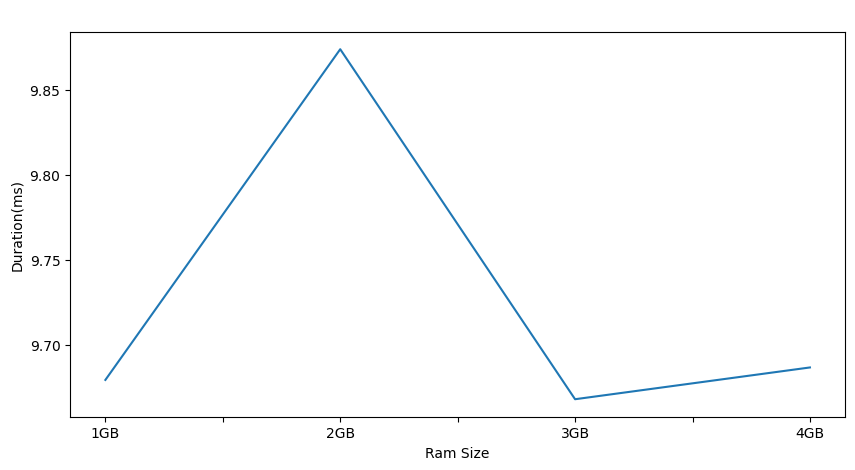

In [45]:
# plot a graph of durations i.e 1GB, 2GB, 3GB, 4GB column for the 16th row
# of type line

ax = df.iloc[17,1:].plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='Snapshot Reload time')
# Change the color of x and y axis labels
ax.set_xlabel('Ram Size', color='black')
ax.set_ylabel('Duration(ms)', color='black')

# Change the color of x and y axis tick labels
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black') 

ax.set_title('Snapshot Reload time', color='white')
# ax.set_facecolor('black')
# ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()




# vanilla_load_time = df.iloc[17,1:]
# vanilla_child_startup = df.iloc[2:6,1:]

In [38]:
vanilla_child_startup

,1GB,2GB,3GB,4GB
2,0.494667,0.580333,0.551667,0.556667
3,0.012000,0.013667,0.014000,0.014667
4,0.029333,0.033667,0.032667,0.033333
5,0.389000,0.298333,0.342000,0.332667


In [39]:
# print the mean of the 16th row
print(df.iloc[17,1:].mean())

9.727249999999998


## ODF Enabled

In [11]:
df1 = get_avg_duration(1, 'backup/run_odf')
df2 = get_avg_duration(2, 'backup/run_odf')
df3 = get_avg_duration(3, 'backup/run_odf')
df4 = get_avg_duration(4, 'backup/run_odf')
df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns = ['event', '1GB', 'event', '2GB', 'event', '3GB', 'event', '4GB']

# remove all the duplicate events, only have one
df = df.loc[:,~df.columns.duplicated()]
# convert the columns 1GB, 2GB, 3GB, 4GB to numerical ones(float)
df[['1GB', '2GB', '3GB', '4GB']] = df[['1GB', '2GB', '3GB', '4GB']].apply(pd.to_numeric)

df

HMP Start loading the snapshot
HMP Start loading the snapshot
HMP Start loading the snapshot
HMP Start loading the snapshot


,event,1GB,2GB,3GB,4GB
0,Starting forkall,0.000000,0.000000,0.000000,0.000000
1,Starting parent,102.511333,101.417000,101.358333,101.928667
2,Starting child,0.430000,0.570667,0.455000,0.529333
3,Started wait for iothread lock,0.149000,0.059333,0.079667,0.060333
4,Acquired iothread lock,0.147333,0.088000,0.096333,0.072667
5,HMP done in parent,0.471333,0.316000,0.249667,0.534000
6,Restored threads,0.693000,0.587667,0.557000,0.569000
7,Started wait for iothread lock,0.926000,0.995667,1.059667,1.142000
8,Acquired iothread lock,1.377333,0.132667,0.335333,0.927000
9,Got the socket conn CHILD,389.510333,586.773667,533.789667,386.397667


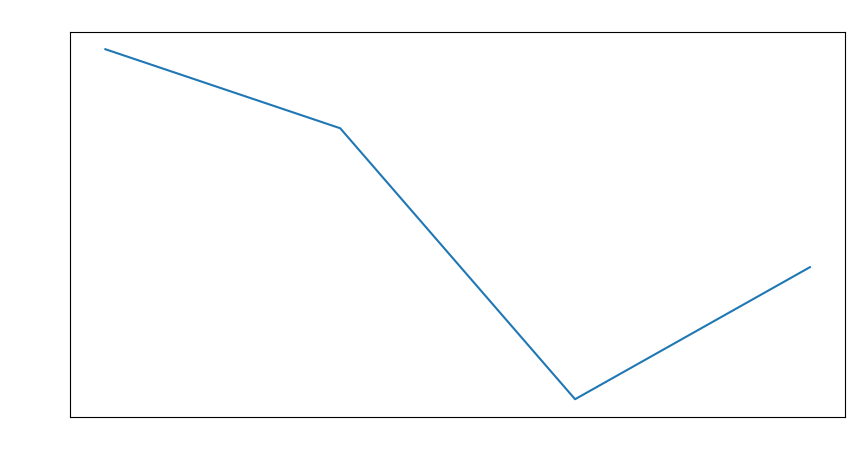

In [12]:
# plot a graph of durations i.e 1GB, 2GB, 3GB, 4GB column for the 16th row
# of type line

ax = df.iloc[16,1:].plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='Snapshot Reload time')
# Change the color of x and y axis labels
ax.set_xlabel('Ram Size', color='white')
ax.set_ylabel('Duration(ms)', color='white')

# Change the color of x and y axis tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white') 

ax.set_title('Snapshot Reload time', color='white')

plt.show()

odf_load_time = df.iloc[16,1:]
odf_child_startup = df.iloc[2:6,1:]


In [13]:
# print the mean of the 16th row
print(df.iloc[16,1:].mean())

10.232


## ODF + EPT 

In [14]:
df1 = get_avg_duration(1, 'backup/run_odf_ept')
df2 = get_avg_duration(2, 'backup/run_odf_ept')
df3 = get_avg_duration(3, 'backup/run_odf_ept')
df4 = get_avg_duration(4, 'backup/run_odf_ept')
df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns = ['event', '1GB', 'event', '2GB', 'event', '3GB', 'event', '4GB']

# remove all the duplicate events, only have one
df = df.loc[:,~df.columns.duplicated()]
# convert the columns 1GB, 2GB, 3GB, 4GB to numerical ones(float)
df[['1GB', '2GB', '3GB', '4GB']] = df[['1GB', '2GB', '3GB', '4GB']].apply(pd.to_numeric)
df



HMP Start loading the snapshot
Enabling EPT sharing
Enabling EPT sharing
Enabling EPT sharing
Enabling EPT sharing


,event,1GB,2GB,3GB,4GB
0,Starting forkall,0.000000,0.000000,0.000000,0.000000
1,Starting parent,103.344333,102.078667,101.637333,102.099000
2,Starting child,0.580333,0.515667,0.481000,0.479000
3,Started wait for iothread lock,0.131000,0.166667,0.146667,0.127667
4,Acquired iothread lock,0.130667,0.067667,0.046667,0.099000
5,HMP done in parent,1633.523000,0.385333,0.404667,0.484667
6,Restored threads,7.688333,0.761667,0.821333,0.648000
7,Started wait for iothread lock,1.323000,1.202333,1.136333,1.183667
8,Acquired iothread lock,2.808929,0.688333,0.040000,0.347667
9,Got the socket conn CHILD,346.928214,352.771667,371.931000,386.570000


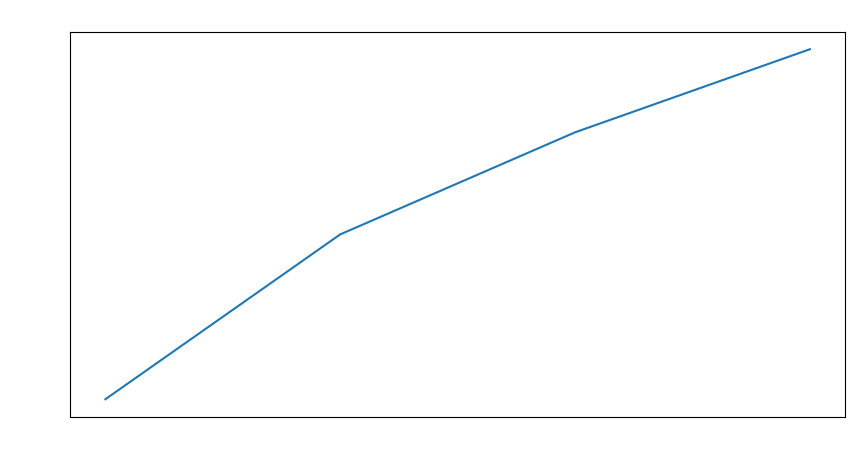

In [15]:
# plot a graph of durations i.e 1GB, 2GB, 3GB, 4GB column for the 16th row
# of type line

ax = df.iloc[18,1:].plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='Snapshot Reload time')
# Change the color of x and y axis labels
ax.set_xlabel('Ram Size', color='white')
ax.set_ylabel('Duration(ms)', color='white')

# Change the color of x and y axis tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white') 

ax.set_title('Snapshot Reload time', color='white')

plt.show()

odf_ept_load_time = df.iloc[18,1:]
odf_ept_share_latency = df.iloc[12,1:]
odf_ept_child_startup = df.iloc[2:6,1:]



In [16]:
# print the mean of the 16th row
print(df.iloc[18,1:].mean())

10.027898809523812


## Only EPT

In [17]:
df1 = get_avg_duration(1, 'backup/run_ept')
df2 = get_avg_duration(2, 'backup/run_ept')
df3 = get_avg_duration(3, 'backup/run_ept')
df4 = get_avg_duration(4, 'backup/run_ept')
df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns = ['event', '1GB', 'event', '2GB', 'event', '3GB', 'event', '4GB']

# remove all the duplicate events, only have one
df = df.loc[:,~df.columns.duplicated()]
# convert the columns 1GB, 2GB, 3GB, 4GB to numerical ones(float)
df[['1GB', '2GB', '3GB', '4GB']] = df[['1GB', '2GB', '3GB', '4GB']].apply(pd.to_numeric)
df


Enabling EPT sharing
Enabling EPT sharing
Enabling EPT sharing
Enabling EPT sharing


,event,1GB,2GB,3GB,4GB
0,Starting forkall,0.000000,0.000000,0.000000,0.000000
1,Starting parent,102.462000,102.143667,102.167333,101.307667
2,Starting child,0.631667,0.519000,0.483667,0.581000
3,Started wait for iothread lock,0.158333,0.149667,0.157000,0.122667
4,Acquired iothread lock,0.077667,0.136000,0.123667,0.031667
5,HMP done in parent,0.293667,1.037000,0.395000,0.437333
6,Restored threads,0.785333,0.552000,0.759333,0.683333
7,Started wait for iothread lock,1.277333,0.996000,0.937333,0.992333
8,Acquired iothread lock,0.040000,0.060000,0.889333,0.835333
9,Got the socket conn CHILD,429.763667,433.091667,415.891000,412.818333


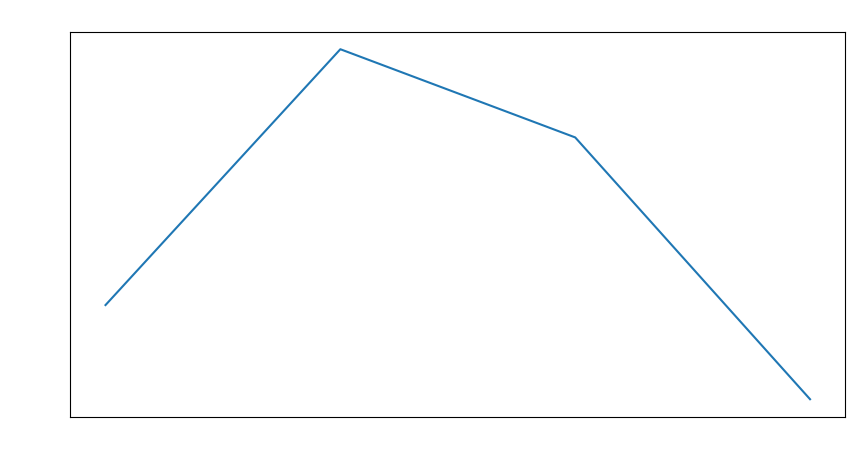

In [18]:
# plot a graph of durations i.e 1GB, 2GB, 3GB, 4GB column for the 16th row
# of type line

ax = df.iloc[18,1:].plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='Snapshot Reload time')
# Change the color of x and y axis labels
ax.set_xlabel('Ram Size', color='white')
ax.set_ylabel('Duration(ms)', color='white')

# Change the color of x and y axis tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white') 

ax.set_title('Snapshot Reload time', color='white')

plt.show()

ept_load_time = df.iloc[18,1:]
ept_share_latency = df.iloc[12,1:]
ept_child_startup = df.iloc[2:6,1:]


In [19]:
# print the mean of the 16th row
print(df.iloc[18,1:].mean())

11.242916666666666


## Load State Comparison

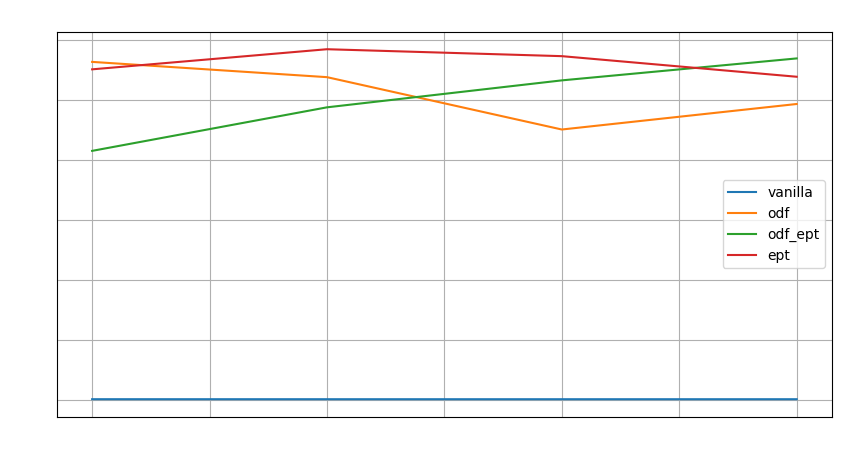

In [20]:
load_time = pd.concat([vanilla_load_time, odf_load_time, odf_ept_load_time, ept_load_time], axis=1)
load_time.columns = ['vanilla', 'odf', 'odf_ept', 'ept']
# plot each column using different colors and a legend
ax = load_time.plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='Snapshot Reload time')
ax.set_xlabel('Ram Size', color='white')
ax.set_ylabel('Duration(ms)', color='white')

# Change the color of x and y axis tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white') 

ax.set_title('Snapshot Reload time', color='white')
plt.grid(True)

## KVM_EPT_ODF Latency Comparison

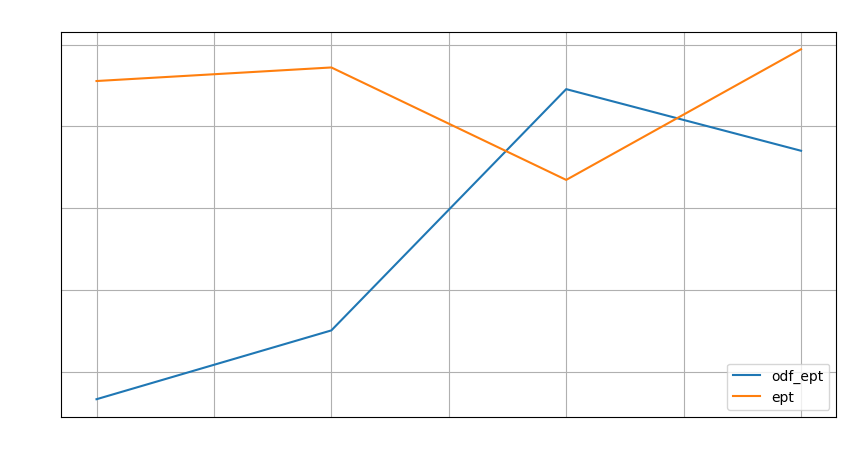

In [21]:
share_latency = pd.concat([odf_ept_share_latency, ept_share_latency], axis=1)
share_latency.columns = ['odf_ept', 'ept']
# plot each column using different colors and a legend
ax = share_latency.plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='EPT Share Latency')
ax.set_xlabel('Ram Size', color='white')
ax.set_ylabel('Duration(ms)', color='white')

# Change the color of x and y axis tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white') 

ax.set_title('EPT Share Latency', color='white')
plt.grid(True)

In [22]:
share_latency

,odf_ept,ept
1GB,5.330357,7.278333
2GB,5.751667,7.361333
3GB,7.228667,6.673
4GB,6.851333,7.473


## Child Process Startup Time Comparison

In [23]:

vanilla_child_startup_sum = vanilla_child_startup.sum(axis=0)
odf_child_startup_sum = odf_child_startup.sum(axis=0)
odf_ept_child_startup_sum = odf_ept_child_startup.sum(axis=0)
ept_child_startup_sum = ept_child_startup.sum(axis=0)

odf_ept_child_startup

,1GB,2GB,3GB,4GB
2,0.580333,0.515667,0.481000,0.479000
3,0.131000,0.166667,0.146667,0.127667
4,0.130667,0.067667,0.046667,0.099000
5,1633.523000,0.385333,0.404667,0.484667


In [24]:
vanilla_child_startup_sum

1GB    0.925000
2GB    0.926000
3GB    0.940333
4GB    0.937333
dtype: float64

In [25]:
child_startup_sum = pd.concat([vanilla_child_startup_sum, odf_child_startup_sum, odf_ept_child_startup_sum, ept_child_startup_sum], axis=1)
child_startup_sum.columns = ['vanilla', 'odf', 'odf_ept', 'ept']
child_startup_sum

,vanilla,odf,odf_ept,ept
1GB,0.925000,1.197667,1634.365000,1.161333
2GB,0.926000,1.034000,1.135333,1.841667
3GB,0.940333,0.880667,1.079000,1.159333
4GB,0.937333,1.196333,1.190333,1.172667


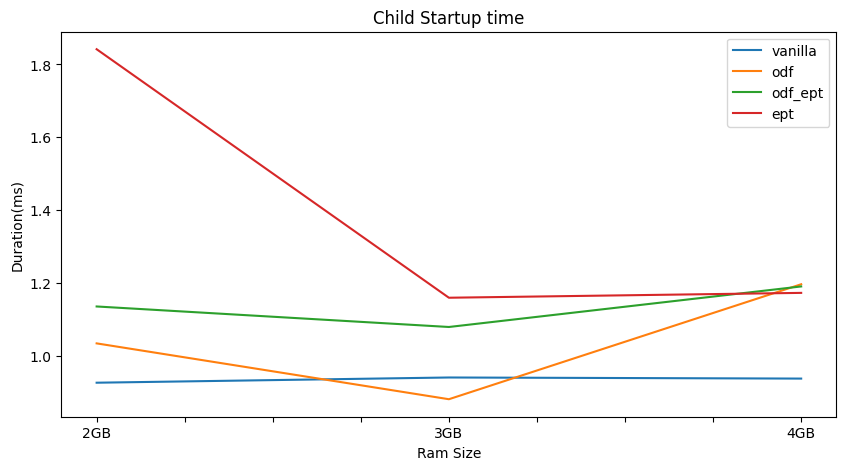

In [26]:
# plot each column using different colors and a legend ignoring the first row
ax = child_startup_sum.iloc[1:].plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='Child Startup time')
# ax = child_startup_sum.plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='Child Startup time')